In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from kmeans_pytorch import kmeans, kmeans_predict
from sklearn.decomposition import PCA
from sklearn import datasets


The clustering can be batched now, by handing over cluster_centers to kmeans. That it works can be seen quite nicely when going from batch 1 to batch 2, there's a blob that get's assigned the right cluster this time.


Note: The algorigthm runs into problems when it assigns the same points to two clusters. This happens often when resuming the clustering, but can occasionally also happen during a normal run. 
It's not likely to occur with high dimensional data, and more data itself seems to work, too. See https://github.com/subhadarship/kmeans_pytorch/issues/3

In [2]:
seed = 18
num_clusters = 10

# set random seed
np.random.seed(seed)

In [3]:
n_samples = 1000

blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed, centers = num_clusters,n_features = 10)

batch_1 = torch.from_numpy(blobs[0][:100])

batch_2 = torch.from_numpy(blobs[0][100:200])

batch_3 = torch.from_numpy(blobs[0][200:500])

y = torch.from_numpy(blobs[0][500:])

In [4]:
# plot
def plot_blobs(x,cluster_ids_x):
    pca = PCA(2)
    y_2d = pca.fit_transform(y)
    x_2d = pca.transform(x)
    
    plt.figure(figsize=(4, 3), dpi=160)
    plt.scatter(x_2d[:, 0], x_2d[:, 1], c=cluster_ids_x, cmap='cool')
    plt.scatter(y_2d[:, 0], y_2d[:, 1], c=cluster_ids_y, cmap='cool', marker='X')
    plt.scatter(
        cluster_centers[:, 0], cluster_centers[:, 1],
        c='white',
        alpha=0.6,
        edgecolors='black',
        linewidths=2
    )
    #plt.axis([-1, 1, -1, 1])
    plt.tight_layout()
    plt.show()

In [5]:
blobs[0][2:5]

array([[ -3.57607944,  -5.49279973, -11.24033377,  -5.58584688,
         -6.49597733,  -3.66076857,   7.8863303 ,   5.73574873,
          5.30682772,  -6.52582304],
       [  3.65151091,  -4.1693436 ,   6.51452454,   6.11181855,
         -6.03164542,   9.718691  ,  -0.27650898,   3.74241734,
         -7.18632993,   3.88353736],
       [  1.60333625,   9.26137504,   4.9727277 ,   2.59262293,
         -7.83707719,   5.98862385,  -1.25714363,   1.3738497 ,
         -9.61690325,  -6.60493591]])

In [6]:
# set device
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

In [7]:
# k-means
cluster_ids_x, cluster_centers = kmeans(
    X=batch_1, num_clusters=num_clusters, distance='euclidean', device=device
)

running k-means on cuda:0..


[running kmeans]: 4it [00:00, 300.74it/s, center_shift=0.000000, iteration=4, tol=0.000100]  


predicting on cuda:0..


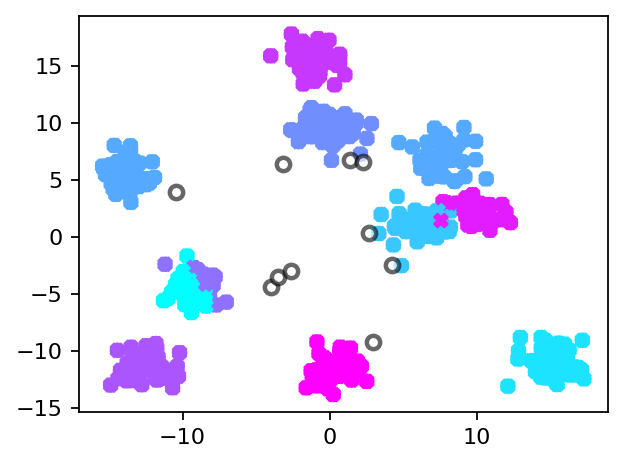

In [8]:
# predict cluster ids for y
cluster_ids_y = kmeans_predict(
    y, cluster_centers, 'euclidean', device=device
)
plot_blobs(y,cluster_ids_y)

[running kmeans]: 1it [00:00, 218.75it/s, center_shift=245.281052, iteration=2, tol=0.000100]

running k-means on cuda:0..
resuming


[running kmeans]: 3it [00:00, 128.70it/s, center_shift=0.000000, iteration=3, tol=0.000100]  

predicting on cuda:0..


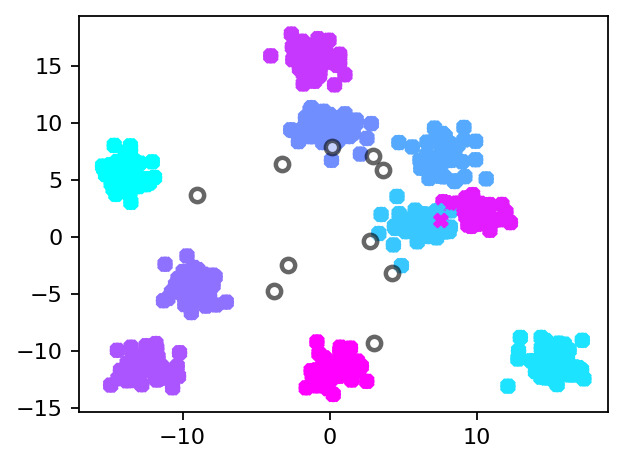

In [9]:
# second batch

# k-means with previous cluster centers
cluster_ids_x, cluster_centers = kmeans(
    X=batch_2, num_clusters=num_clusters,
    cluster_centers = cluster_centers,
    distance='euclidean', device=device
)

# predict cluster ids for y
cluster_ids_y = kmeans_predict(
    y, cluster_centers, 'euclidean', device=device
)

plot_blobs(y,cluster_ids_y)

[running kmeans]: 2it [00:00, 262.92it/s, center_shift=0.000000, iteration=2, tol=0.000100]


running k-means on cuda:0..
resuming
predicting on cuda:0..


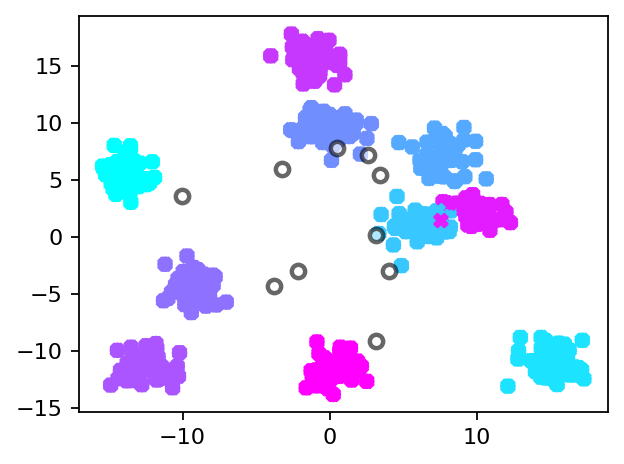

In [10]:
# third batch

# k-means with previous cluster centers
cluster_ids_x, cluster_centers = kmeans(
    X=batch_3, num_clusters=num_clusters,
    cluster_centers = cluster_centers,
    distance='euclidean', device=device
)


# predict cluster ids for y
cluster_ids_y = kmeans_predict(
    y, cluster_centers, 'euclidean', device=device
)
plot_blobs(y,cluster_ids_y)